ValueError: unconverted data remains: 20

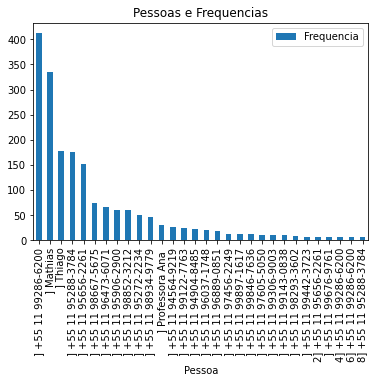

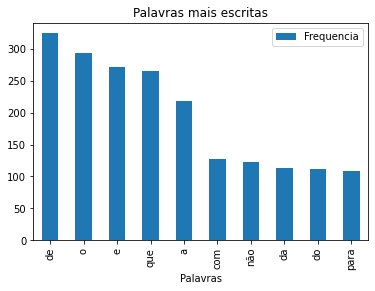

In [5]:
# Importando bibliotecas. 
from datetime import datetime
import matplotlib
import matplotlib.pyplot as mplot
import pandas as pd
import seaborn as sns
from collections import Counter


# Setando o arquivo com as conversas.
dados_arquivo = open('chat.txt', 'r', encoding = 'utf-8')
linha = dados_arquivo.readline()

# lists onde serão armazenadas as infos separadamente.
lista_data = []
lista_hora = []
lista_pessoa = []
lista_mensagem = []
lista_erro = []

# Abrindo o arquivo para leitura das informações.
while linha:
    linha = dados_arquivo.readline()
    try:
        objeto_data = linha[1:18]
        
        # Adicionando data e hora em listas
        if(len(objeto_data.split()) >= 2):
            lista_data.append(objeto_data.split()[0])
            lista_hora.append(objeto_data.split()[1])
        
        info = linha[20:]
        
        # Adicionando pessoas e informações em listas
        if(len(info.split(":")) >= 2):
            lista_pessoa.append(info.split(":")[0])
            lista_mensagem.append(info.split(":")[1])
    
    except ValueError:
        lista_erro.append("Dados sem formatação!")

dados_arquivo.close()   

type(Counter(lista_pessoa))

# Transformando a lista de pessoas em um dicionario
pessoas = dict(Counter(lista_pessoa))

# Criando um data frame com os valores das listas
pessoas_df = pd.DataFrame(pessoas.items(), columns=['Pessoa', 'Frequencia'])
pessoas_df = pessoas_df.sort_values(by=['Frequencia'], ascending=False)
pessoas_df.head(30).plot(kind='bar', x = 'Pessoa', y = 'Frequencia', title = 'Pessoas e Frequencias')

# Funcao para contar palavras
def conta_palavras(msgs):
    palavras = []
    for frases in msgs:
         for palavra in frases.split():
            palavras.append(palavra)
    return Counter(palavras)

palavras_dict = dict(conta_palavras(lista_mensagem))

palavras_df = pd.DataFrame(palavras_dict.items(), columns=['Palavras', 'Frequencia'])
palavras_df = palavras_df.sort_values(by=['Frequencia'], ascending=False)
palavras_df.head(10).plot(kind='bar', x = 'Palavras', y = 'Frequencia', title = 'Palavras mais escritas')

# Exibindo o dia da semana que mais conversam
dia_semana = ['Domingo', 'Segunda', 'Terça', 'Quarta', 'Quinta', 'Sexta', 'Sabado']

list_dia_da_semana = []
list_horas = []

for data in lista_data:
    dt = datetime.strptime(data, "%d/%m/%y")
    dia = dt.weekday()
    list_dia_da_semana.append(dia_semana[dia])

qtd_dia_semana = dict(Counter(list_dia_da_semana))
semana_df = pd.DataFrame(qtd_dia_semana.items(), columns = ['Dia da semana', 'Frequencia'])
semana_df.plot(kind='bar', x = 'Dia da semana', y = 'Frequencia', title = 'dia que mais fala')

for hora in lista_hora:
    list_horas.append(hora[0:2])
    
qtd_hora = dict(Counter(list_horas))
horas_df = pd.DataFrame(qtd_hora.items(), columns = ['Hora semana', 'Frequencia'])
horas_df.head(24).plot(kind='bar', x = 'Hora semana', y = 'Frequencia', title = 'Hora que mais fala')